<ipython-input-57-2d380ed7239a>:22: FutureWarning: The provided callable <function max at 0x7ad3bf563490> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_pivot = df_filtered.pivot_table(values='Data_Value', index='day_of_year', columns='Element', aggfunc=np.max)


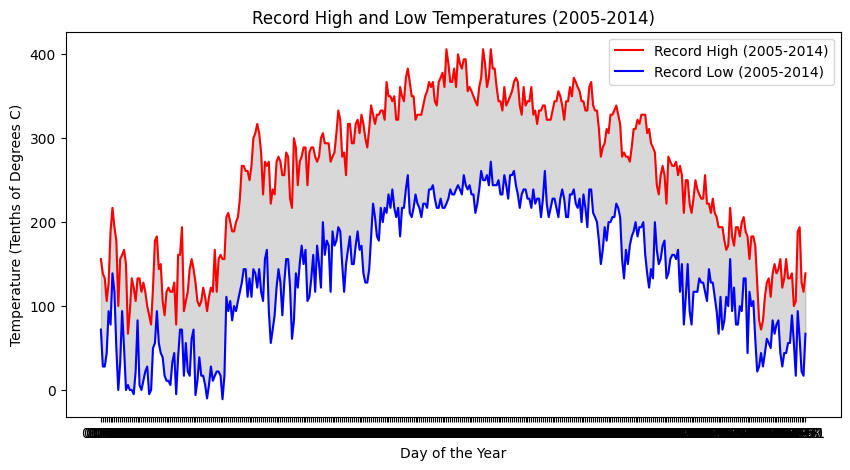

In [57]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('temperature.csv')

# Convert 'date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract year and day of year from the date
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.strftime('%m-%d')

# Filter data for years 2005-2014
df_filtered = df[(df['year'] >= 2005) & (df['year'] <= 2014)]

# Remove February 29th to handle leap years
f_filtered = df[(df['year'] >= 2005) & (df['year'] <= 2014)]

# Pivot the data to have TMAX and TMIN as separate columns
df_pivot = df_filtered.pivot_table(values='Data_Value', index='day_of_year', columns='Element', aggfunc=np.max)

# Find the record high and low temperatures for each day
record_high = df_pivot['TMAX']
record_low = df_pivot['TMIN']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(record_high, label='Record High (2005-2014)', color='red')
plt.plot(record_low, label='Record Low (2005-2014)', color='blue')
plt.fill_between(record_high.index, record_high, record_low, color='gray',alpha=0.3)
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Record High and Low Temperatures (2005-2014)')
plt.legend()
plt.show()


In [58]:
record_high = record_high.reindex(df_2015_pivot.index)
record_low = record_low.reindex(df_2015_pivot.index)

<ipython-input-59-1d6adc13de51>:6: FutureWarning: The provided callable <function max at 0x7ad3bf563490> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_2015_pivot = df_2015.pivot_table(values='Data_Value', index='day_of_year', columns='Element', aggfunc=np.max)


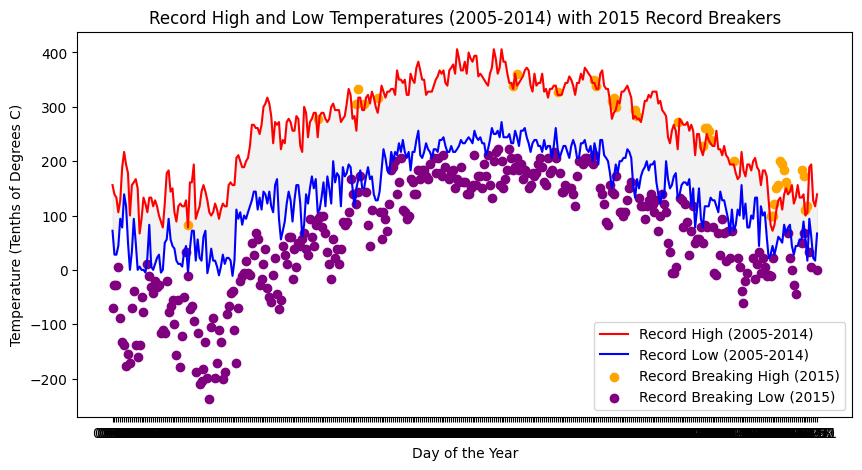

In [59]:
# Filter data for the year 2015
df_2015 = df[df['year'] == 2015]
df_2015 = df_2015[df_2015['day_of_year'] != '02-29']

# Pivot 2015 data
df_2015_pivot = df_2015.pivot_table(values='Data_Value', index='day_of_year', columns='Element', aggfunc=np.max)

# Identify record-breaking highs and lows in 2015
record_breaking_highs = df_2015_pivot['TMAX'] > record_high
record_breaking_lows = df_2015_pivot['TMIN'] < record_low

# Plotting with 2015 overlay
plt.figure(figsize=(10, 5))
plt.plot(record_high, label='Record High (2005-2014)', color='red')
plt.plot(record_low, label='Record Low (2005-2014)', color='blue')
plt.fill_between(record_high.index, record_high, record_low, color='gray', alpha=0.1)
plt.scatter(df_2015_pivot.index[record_breaking_highs], df_2015_pivot['TMAX'][record_breaking_highs], color='orange', label='Record Breaking High (2015)')
plt.scatter(df_2015_pivot.index[record_breaking_lows], df_2015_pivot['TMIN'][record_breaking_lows], color='purple', label='Record Breaking Low (2015)')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Record Breakers')
plt.legend()
plt.show()


In [55]:
import folium

# Assuming we have latitude and longitude of stations in 'station_info.csv'
station_df = pd.read_csv('BinSize.csv')

# Filter stations near Ann Arbor (for simplicity, let's assume we have coordinates)
ann_arbor_lat, ann_arbor_lon = 42.2808, -83.7430
station_df['distance_to_ann_arbor'] = np.sqrt((station_df['LATITUDE'] - ann_arbor_lat)**2 + (station_df['LONGITUDE'] - ann_arbor_lon)**2)

# Visualize stations within 50 km of Ann Arbor (dummy threshold)
nearby_stations = station_df[station_df['distance_to_ann_arbor'] < 0.5]

# Create a map centered on Ann Arbor
m = folium.Map(location=[ann_arbor_lat, ann_arbor_lon], zoom_start=10)

# Add station markers to the map
for _, row in nearby_stations.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['ID']
    ).add_to(m)

# Display the map
m


<ipython-input-56-f8b3ae1ecaff>:6: FutureWarning: The provided callable <function mean at 0x7ad3bf563d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_2015_summary = df_2015_ann_arbor.pivot_table(values='Data_Value', index='day_of_year', columns='Element', aggfunc=np.mean)


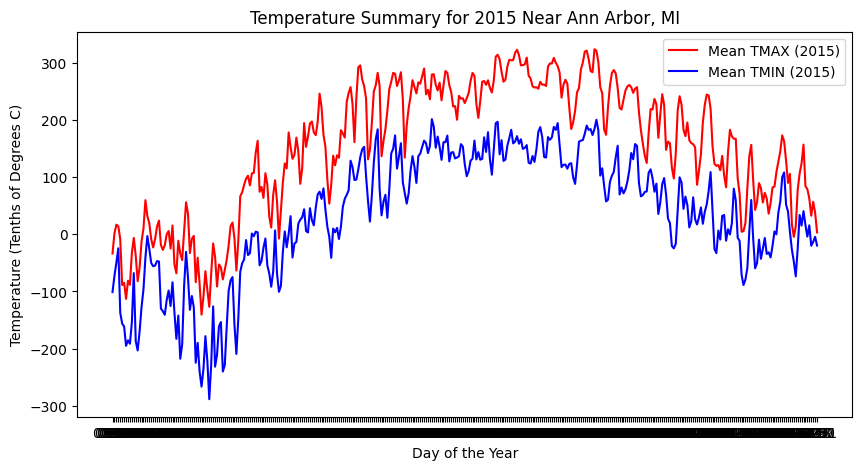

In [56]:
# Filter 2015 data near Ann Arbor (using station IDs from previous step)
stations_near_ann_arbor = nearby_stations['ID'].tolist()
df_2015_ann_arbor = df_2015[df_2015['ID'].isin(stations_near_ann_arbor)]

# Pivot the data for plotting
df_2015_summary = df_2015_ann_arbor.pivot_table(values='Data_Value', index='day_of_year', columns='Element', aggfunc=np.mean)

# Plot the 2015 temperature summary
plt.figure(figsize=(10, 5))
plt.plot(df_2015_summary['TMAX'], label='Mean TMAX (2015)', color='red')
plt.plot(df_2015_summary['TMIN'], label='Mean TMIN (2015)', color='blue')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Temperature Summary for 2015 Near Ann Arbor, MI')
plt.legend()
plt.show()
